In [35]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [36]:

# fix random seed for reproducibility
numpy.random.seed(7)

In [37]:
# load the dataset
dataframe = pandas.read_csv('DatasetMonthly3.csv', usecols=[1], sep = ",")
dataset = dataframe.values
dataset = dataset.astype('float32')

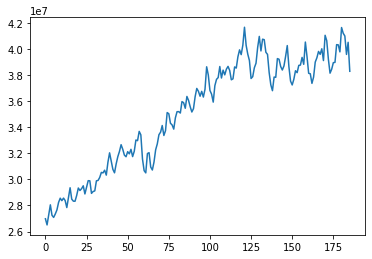

In [38]:
plt.plot(dataset)
plt.show()

In [39]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [40]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

124 62


In [41]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [42]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [43]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [44]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 0.2747
Epoch 2/100
 - 0s - loss: 0.1516
Epoch 3/100
 - 0s - loss: 0.0901
Epoch 4/100
 - 0s - loss: 0.0639
Epoch 5/100
 - 0s - loss: 0.0540
Epoch 6/100
 - 0s - loss: 0.0490
Epoch 7/100
 - 0s - loss: 0.0451
Epoch 8/100
 - 0s - loss: 0.0415
Epoch 9/100
 - 0s - loss: 0.0378
Epoch 10/100
 - 0s - loss: 0.0341
Epoch 11/100
 - 0s - loss: 0.0304
Epoch 12/100
 - 0s - loss: 0.0266
Epoch 13/100
 - 0s - loss: 0.0229
Epoch 14/100
 - 0s - loss: 0.0194
Epoch 15/100
 - 0s - loss: 0.0160
Epoch 16/100
 - 0s - loss: 0.0129
Epoch 17/100
 - 0s - loss: 0.0104
Epoch 18/100
 - 0s - loss: 0.0080
Epoch 19/100
 - 0s - loss: 0.0061
Epoch 20/100
 - 0s - loss: 0.0047
Epoch 21/100
 - 0s - loss: 0.0037
Epoch 22/100
 - 0s - loss: 0.0029
Epoch 23/100
 - 0s - loss: 0.0024
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0019
Epoch 27/100
 - 0s - loss: 0.0018
Epoch 28/100
 - 0s - loss: 0.0018
Epoch 29/100
 - 0s - loss: 0.0018
Epoch 30/100
 - 0s - lo

In [45]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainScore2 = r2_score(trainY[0], trainPredict[:,0])
print('Train Score: %.2f R2' % (trainScore2))
testScore2 = r2_score(testY[0], testPredict[:,0])
print('Test Score: %.2f R2' % (testScore2))

Train Score: 631472.75 RMSE
Test Score: 834822.28 RMSE
Train Score: 0.97 R2
Test Score: 0.46 R2


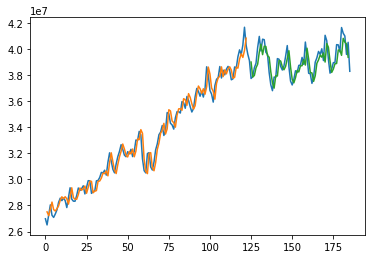

In [46]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
testPredictPlot


array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],


In [48]:
testY[0]

array([37726473.29214316, 37866808.28849752, 38550695.85281252,
       38894975.90356412, 40100439.9451694 , 40950729.77474269,
       39838308.44235577, 40738291.82431247, 40699842.69295231,
       39735953.15708765, 39573743.17596808, 38179070.26564182,
       37240554.70104574, 36792496.66050347, 37836826.77669404,
       37818306.34142486, 39251998.90929037, 39201265.41045395,
       38645417.64224149, 38376548.15303437, 38693923.20023933,
       39427421.26565851, 40248708.1441532 , 38626337.51356877,
       37527876.01794355, 37232054.5831624 , 37668460.16813561,
       38319672.4704598 , 38175488.22785921, 38728523.08535326,
       38754622.85258384, 39342315.36999475, 38813275.11034896,
       40518866.73365104, 39408438.63196576, 38127629.02546932,
       38087869.12826733, 37353356.39287144, 37838292.81231879,
       38982223.07786203, 39311990.82029879, 39799808.75804304,
       39577112.16916484, 40003645.48468476, 39100845.58108448,
       41036994.77739052, 40622117.52836

In [49]:
 testPredict[:,0]

array([38986316., 37837060., 37959976., 38540910., 38822060., 39748184.,
       40349264., 39554348., 40202964., 40176216., 39477540., 39354510.,
       38228950., 37401750., 36987190., 37933824., 37917640., 39105704.,
       39065884., 38619020., 38395828., 38658790., 39242150., 39856012.,
       38603332., 37660960., 37394000., 37785880., 38348020., 38225904.,
       38687070., 38708350., 39176190., 38756024., 40049172., 39227480.,
       38185070., 38151044., 37504136., 37935100., 38892110., 39152584.,
       39525532., 39357084., 39677090., 38986590., 40407950., 40121880.,
       39058630., 38191270., 38447250., 38857524., 38875404., 39908140.,
       39895532., 39500612., 40801476., 40514880., 40370656., 39352196.],
      dtype=float32)

In [50]:
y_test = [[37726470.0],
[37866810.0],
[38550696.0],
[38894976.0],
[40100440.0],
[40950730.0],
[39838308.0],
[40738292.0],
[40699844.0],
[39735950.0],
[39573744.0],
[38179070.0],
[37240556.0],
[36792496.0],
[37836828.0],
[37818308.0],
[39252000.0],
[39201264.0],
[38645416.0],
[38376548.0],
[38693924.0],
[39427420.0],
[40248708.0],
[38626336.0],
[37527876.0],
[37232056.0],
[37668460.0],
[38319670.0],
[38175490.0],
[38728524.0],
[38754624.0],
[39342316.0],
[38813276.0],
[40518868.0],
[39408440.0],
[38127628.0],
[38087868.0],
[37353356.0],
[37838292.0],
[38982224.0],
[39311990.0],
[39799810.0],
[39577110.0],
[40003644.0],
[39100844.0],
[41036996.0],
[40622116.0],
[39192050.0],
[38134884.0],
[38438004.0],
[38939068.0],
[38961360.0],
[40321036.0],
[40303504.0],
[39766610.0],
[41631610.0],
[41195736.0],
[40982100.0],
[39570708.0],
[40498880.0]]

In [51]:
y_pred = [[39062350.0],
[37799576.0],
[37931684.0],
[38565420.0],
[38877936.0],
[39936076.0],
[40647596.0],
[39710852.0],
[40472570.0],
[40440692.0],
[39622170.0],
[39480772.0],
[38223140.0],
[37336996.0],
[36903696.0],
[37903510.0],
[37886100.0],
[39197252.0],
[39152176.0],
[38651850.0],
[38405656.0],
[38695976.0],
[39352336.0],
[40062244.0],
[38634468.0],
[37611470.0],
[37328836.0],
[37744770.0],
[38353236.0],
[38219820.0],
[38727400.0],
[38751070.0],
[39277250.0],
[38804180.0],
[40289864.0],
[39335612.0],
[38175364.0],
[38138376.0],
[37445076.0],
[37904892.0],
[38956424.0],
[39250424.0],
[39677548.0],
[39483720.0],
[39853228.0],
[39062664.0],
[40718148.0],
[40376080.0],
[39143976.0],
[38182110.0],
[38462164.0],
[38917640.0],
[38937684.0],
[40123470.0],
[40108650.0],
[39648772.0],
[41196220.0],
[40847184.0],
[40673290.0],
[39478116.0]]